In [1]:
#import relevant packages
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,RocCurveDisplay
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
import tensorflow
import nltk
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet # imports WordNet
from nltk import pos_tag # nltk's native part of speech tagging
from nltk.tokenize import RegexpTokenizer
import string
import itertools
from collections import Counter
import re
from sklearn.naive_bayes import MultinomialNB

from keras.layers import Input, Dense, LSTM, Embedding, Dropout, Activation, Bidirectional, GlobalMaxPool1D, Flatten
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
import tensorflow
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D 

In [2]:
spotify_df = pd.read_csv('data/spotify_songs.csv')
genius_df = pd.read_csv('data/song_lyric.csv')
genius_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   3103 non-null   object
 1   Artist_Name  3103 non-null   object
 2   Lyrics       3103 non-null   object
dtypes: object(3)
memory usage: 72.9+ KB


In [3]:
genius_df.head()

,Track_Name,Artist_Name,Lyrics
0,NFL,Lil Uzi Vert,48 ContributorsTranslationsРусскийNFL Lyrics[I...
1,First Person Shooter (feat. J. Cole),Drake,242 ContributorsTranslationsEspañolDeutschPort...
2,SAY MY GRACE (feat. Travis Scott),Offset,2 ContributorsNew Music Friday 10/13/23 Lyrics...
3,HVN ON EARTH (with Kodak Black),Lil Tecca,1 ContributorNew Music Friday 08/18/23 LyricsD...
4,I KNOW ?,Travis Scott,144 ContributorsTranslationsEspañolРусскийPort...


In [4]:
spotify_df.head()

,Artist Name,Track Name,Album Name,Artist URI,Album URI,Genre
0,Drake,First Person Shooter (feat. J. Cole),For All The Dogs,spotify:artist:3TVXtAsR1Inumwj472S9r4,spotify:album:4czdORdCWP9umpbhFXK2fW,Hip-Hop
1,Offset,SAY MY GRACE (feat. Travis Scott),SET IT OFF,spotify:artist:4DdkRBBYG6Yk9Ka8tdJ9BW,spotify:album:1D1hLipjrdB6pnxurMtC3E,Hip-Hop
2,Lil Tecca,HVN ON EARTH (with Kodak Black),HVN ON EARTH,spotify:artist:4Ga1P7PMIsmqEZqhYZQgDo,spotify:album:5bHwBaNZKESVBhqCvs4Ify,Hip-Hop
3,Travis Scott,I KNOW ?,UTOPIA,spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY,spotify:album:18NOKLkZETa4sWwLMIm0UZ,Hip-Hop
4,Drake,IDGAF (feat. Yeat),For All The Dogs,spotify:artist:3TVXtAsR1Inumwj472S9r4,spotify:album:4czdORdCWP9umpbhFXK2fW,Hip-Hop


In [5]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3381 entries, 0 to 3380
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist Name  3381 non-null   object
 1   Track Name   3381 non-null   object
 2   Album Name   3381 non-null   object
 3   Artist URI   3381 non-null   object
 4   Album URI    3381 non-null   object
 5   Genre        3381 non-null   object
dtypes: object(6)
memory usage: 158.6+ KB


In [6]:
#rename column names for merging
spotify_df.rename(columns={'Artist Name': 'Artist_Name', 'Track Name': 'Track_Name'}, inplace=True)
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3381 entries, 0 to 3380
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist_Name  3381 non-null   object
 1   Track_Name   3381 non-null   object
 2   Album Name   3381 non-null   object
 3   Artist URI   3381 non-null   object
 4   Album URI    3381 non-null   object
 5   Genre        3381 non-null   object
dtypes: object(6)
memory usage: 158.6+ KB


In [7]:
#merge to get the genre combined with the lyrics
lyrics_df = genius_df.merge(spotify_df, on=['Artist_Name', 'Track_Name'], how='left')
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3225 entries, 0 to 3224
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   3225 non-null   object
 1   Artist_Name  3225 non-null   object
 2   Lyrics       3225 non-null   object
 3   Album Name   3180 non-null   object
 4   Artist URI   3180 non-null   object
 5   Album URI    3180 non-null   object
 6   Genre        3180 non-null   object
dtypes: object(7)
memory usage: 176.5+ KB


In [8]:
lyrics_df.drop(columns=['Album Name', 'Artist URI', 'Album URI'], axis=1, inplace=True)
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3225 entries, 0 to 3224
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   3225 non-null   object
 1   Artist_Name  3225 non-null   object
 2   Lyrics       3225 non-null   object
 3   Genre        3180 non-null   object
dtypes: object(4)
memory usage: 100.9+ KB


In [9]:
lyrics_df.dropna(subset='Genre', inplace=True)
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3180 entries, 0 to 3220
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   3180 non-null   object
 1   Artist_Name  3180 non-null   object
 2   Lyrics       3180 non-null   object
 3   Genre        3180 non-null   object
dtypes: object(4)
memory usage: 124.2+ KB


In [10]:
#view example text
lyrics_df['Lyrics'][240]

"38 ContributorsGot ’Til It’s Gone Lyrics[Intro: Janet Jackson & Q-Tip]\nWhat's, what's the next song?\nThe one about me\nOh, yeah, I like this one\nUh, uh, like Joni says\n\n[Chorus: Joni Mitchell]\nDon't it always seem to go\nThat you don't know what you've got 'til it's\nDon't it always seem to go\nThat you don't know what you've got 'til it's\nDon't it always seem to go\nThat you don't know what you've got 'til it's\nThat you don't know what you've got 'til it's gone\n\n[Verse 1: Janet Jackson]\nHave a feeling, now believing that you\nWere the one I was meant to be with\nOh how I'm wishing, thinking, dreaming 'bout you, and the love\nHow'd I ever let you get away?\n\n[Pre-Chorus: Joni Mitchell]\nDon't it always seem\nDon't it always seem\nDon't it always seem\nDon't it always seem\nSee Janet Jackson LiveGet tickets as low as $169You might also like[Chorus: Joni Mitchell & Q-Tip]\nDon't it always seem to go\nThat you don't know what you've got 'til it's gone\nDon't it always seem to

In [11]:
lyrics_df['Genre'].value_counts()

Genre
punk            526
country         519
Hip-Hop         501
r&b             408
pop             344
classic rock    344
dance           291
reggae          247
Name: count, dtype: int64

In [12]:
lyrics_df['Genre'] = lyrics_df['Genre'].str.replace('Hip-Hop', 'hip-hop')
lyrics_df['Genre'].value_counts()

Genre
punk            526
country         519
hip-hop         501
r&b             408
pop             344
classic rock    344
dance           291
reggae          247
Name: count, dtype: int64

In [13]:
lyrics_df = lyrics_df[lyrics_df['Genre'] != 'pop']
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2836 entries, 0 to 3220
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   2836 non-null   object
 1   Artist_Name  2836 non-null   object
 2   Lyrics       2836 non-null   object
 3   Genre        2836 non-null   object
dtypes: object(4)
memory usage: 110.8+ KB


In [14]:
#define stopwords
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['\n', "''", '``', '—', '2018', "n't", '’', "'m", 'feat', '”', '“', "'re", 'said', 'got', 'tony', "'s", "'ll", '--', 'na',
                  'ai', 'na', "'ve", 'ca']
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [15]:
#removing songs that repeat the same word more than 100 times

# Define the threshold
threshold = 100

# Define a list of stopwords
stopwords_list = stopwords_list

# Function to check if any word exceeds the threshold in lyrics (case-insensitive)
def exceeds_threshold(lyrics):
    word_counts = {}
    words = re.findall(r'\b\w+\b', lyrics.lower())  # Convert to lowercase for case-insensitivity
    for word in words:
        if word not in stopwords_list:
            word_counts[word] = word_counts.get(word, 0) + 1
            if word_counts[word] > threshold:
                return True
    return False

# Identify songs to remove
songs_to_remove = []
for index, row in lyrics_df.iterrows():
    lyrics = row['Lyrics']
    if exceeds_threshold(lyrics):
        songs_to_remove.append(index)

# Remove the songs
lyrics_df_2 = lyrics_df.drop(songs_to_remove)

lyrics_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2700 entries, 0 to 3220
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   2700 non-null   object
 1   Artist_Name  2700 non-null   object
 2   Lyrics       2700 non-null   object
 3   Genre        2700 non-null   object
dtypes: object(4)
memory usage: 105.5+ KB


In [16]:
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2836 entries, 0 to 3220
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   2836 non-null   object
 1   Artist_Name  2836 non-null   object
 2   Lyrics       2836 non-null   object
 3   Genre        2836 non-null   object
dtypes: object(4)
memory usage: 175.3+ KB


In [17]:
lyrics_df_2.reset_index(inplace=True, drop=True)
lyrics_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   2700 non-null   object
 1   Artist_Name  2700 non-null   object
 2   Lyrics       2700 non-null   object
 3   Genre        2700 non-null   object
dtypes: object(4)
memory usage: 84.5+ KB


In [18]:
lyrics_df_2.head()

,Track_Name,Artist_Name,Lyrics,Genre
0,NFL,Lil Uzi Vert,48 ContributorsTranslationsРусскийNFL Lyrics[I...,hip-hop
1,First Person Shooter (feat. J. Cole),Drake,242 ContributorsTranslationsEspañolDeutschPort...,hip-hop
2,SAY MY GRACE (feat. Travis Scott),Offset,2 ContributorsNew Music Friday 10/13/23 Lyrics...,hip-hop
3,HVN ON EARTH (with Kodak Black),Lil Tecca,1 ContributorNew Music Friday 08/18/23 LyricsD...,hip-hop
4,I KNOW ?,Travis Scott,144 ContributorsTranslationsEspañolРусскийPort...,hip-hop


## Corpus Statistics

In [19]:
#Separate out text for additional EDA and lowercase
lyrics = lyrics_df_2['Lyrics'].str.lower()

#remove any words prior to and including 'lyrics'. Each set of lyrics starts with the number of contributors and name of song.
lyrics = lyrics.str.replace(r'^.*?lyrics', '', regex=True)

#remove any words in brackets. in the lyrics, brackets are use to label verse, chorus, intro, etc, or used for other notes.
lyrics = lyrics.str.replace(r'\[.*?\]', '', regex=True)

#remove 'embed' and any numbers in front of embed. this is listed at the end of each set of lyrics
lyrics = lyrics.str.replace(r'\d+embed', '', regex=True)

lyrics[300]

"\nshb\n(trato' cerrado' se hacen como en lo' tiempo')\n\n\ntrato' cerrado' se hacen con un teléfono de aluminio\ntengo al de los ojo' claro' y también tengo al lado al de los ojo' demonio\nde tanto número' que hago que pasan por mi cabeza cojo insomnio\nnada me lo tomo en serio porque la verdad e' que a ninguno de estos odio\ntirándome indirecta' como si yo fuese acaso tu novia\ntú sabe' que en la calle no me aguantas y que a ti te juro que te agobian\nen españa, más de uno se va porque aquí la cosa se puso seria\ntra-trato' que hago con—, robo' que hacen de material\nuno haciendo atraco', parece que la moto a uno se le rompió\nno hubo problema porque rápidamente un colega a él se la cedió\nahora raro hacen la' cuenta', parece que el otro rápidamente midió\nfugas a beny, llaman genio\nfu-fugas a beny, llaman genio\n\n\nuno quiso robar a un compañero en el agua, pero ese se murió\notro' prefieren estar tranquilos en su casa montando en un 'terior\na veces hacen asaltos y te roban a ti 

In [20]:
#instantiate tokenizer to keep only three letter words. tokenize lyrics and build vocab list
pattern = r"(?u)\w{3,}"
tokenizer = RegexpTokenizer(pattern)

lyrics_tokenized = lyrics.apply(lambda x: tokenizer.tokenize(x)).sum()
lyrics_tokenized

['tryin',
 'woah',
 'tryin',
 'woah',
 'woah',
 'first',
 'week',
 'went',
 'bout',
 'ten',
 'ten',
 'first',
 'week',
 'went',
 'bout',
 'ten',
 'ten',
 'yeah',
 'big',
 'body',
 'feel',
 'pain',
 'just',
 'spiked',
 'soda',
 'like',
 'nfl',
 'bitch',
 'don',
 'call',
 'phone',
 'ooh',
 'you',
 'heard',
 'doin',
 'well',
 'well',
 'don',
 'give',
 'two',
 'like',
 'fendi',
 'belt',
 'whippin',
 'these',
 'babies',
 'need',
 'ten',
 'child',
 'bitch',
 'that',
 'bitch',
 'not',
 'concern',
 'bitch',
 'not',
 'concern',
 'bitch',
 'cern',
 'fuck',
 'with',
 'you',
 'don',
 'like',
 'what',
 'the',
 'verdict',
 'verdict',
 'what',
 'huh',
 'yeah',
 'lil',
 'uzi',
 'lil',
 'uzi',
 'verty',
 'verty',
 'yeah',
 'bustin',
 'phone',
 'out',
 'pocket',
 'bet',
 'have',
 'thirty',
 'thirty',
 'yeah',
 'got',
 'chopper',
 'and',
 'movin',
 'sturdy',
 'sturdy',
 'yeah',
 'wan',
 'talk',
 'about',
 'don',
 'hope',
 'that',
 'wordy',
 'wordy',
 'yеah',
 'put',
 'that',
 'shit',
 'his',
 'brain',
 '

In [21]:
#remove stop words
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
#remove stop words
lyrics_tokenized_stopwords_removed = [word for word in lyrics_tokenized if word not in stopwords_list]
lyrics_tokenized_stopwords_removed

['tryin',
 'woah',
 'tryin',
 'woah',
 'woah',
 'first',
 'week',
 'went',
 'bout',
 'ten',
 'ten',
 'first',
 'week',
 'went',
 'bout',
 'ten',
 'ten',
 'yeah',
 'big',
 'body',
 'feel',
 'pain',
 'spiked',
 'soda',
 'like',
 'nfl',
 'bitch',
 'call',
 'phone',
 'ooh',
 'heard',
 'doin',
 'well',
 'well',
 'give',
 'two',
 'like',
 'fendi',
 'belt',
 'whippin',
 'babies',
 'need',
 'ten',
 'child',
 'bitch',
 'bitch',
 'concern',
 'bitch',
 'concern',
 'bitch',
 'cern',
 'fuck',
 'like',
 'verdict',
 'verdict',
 'huh',
 'yeah',
 'lil',
 'uzi',
 'lil',
 'uzi',
 'verty',
 'verty',
 'yeah',
 'bustin',
 'phone',
 'pocket',
 'bet',
 'thirty',
 'thirty',
 'yeah',
 'chopper',
 'movin',
 'sturdy',
 'sturdy',
 'yeah',
 'wan',
 'talk',
 'hope',
 'wordy',
 'wordy',
 'yеah',
 'put',
 'shit',
 'brain',
 'turn',
 'surgeon',
 'surgeon',
 'never',
 'opened',
 'casket',
 'cause',
 'closed',
 'curtains',
 'first',
 'week',
 'went',
 'bout',
 'ten',
 'ten',
 'first',
 'week',
 'went',
 'bout',
 'ten',
 

In [23]:
print(len(lyrics_tokenized_stopwords_removed))
print(len(set(lyrics_tokenized_stopwords_removed)))

679491
50331


In [24]:
#observe frequency of vocab across all lyrics
vocab_freq_dist = nltk.FreqDist(lyrics_tokenized_stopwords_removed)
vocab_freq_dist.most_common(30)


[('like', 9809),
 ('yeah', 6428),
 ('know', 6098),
 ('love', 5995),
 ('get', 4714),
 ('one', 4187),
 ('see', 3564),
 ('baby', 3515),
 ('let', 3280),
 ('might', 3207),
 ('time', 3203),
 ('back', 3091),
 ('cause', 2995),
 ('wanna', 2932),
 ('make', 2812),
 ('never', 2774),
 ('also', 2636),
 ('come', 2611),
 ('way', 2563),
 ('take', 2446),
 ('want', 2436),
 ('say', 2428),
 ('good', 2255),
 ('right', 2221),
 ('ooh', 2117),
 ('need', 2114),
 ('night', 2049),
 ('life', 1985),
 ('could', 1936),
 ('man', 1929)]

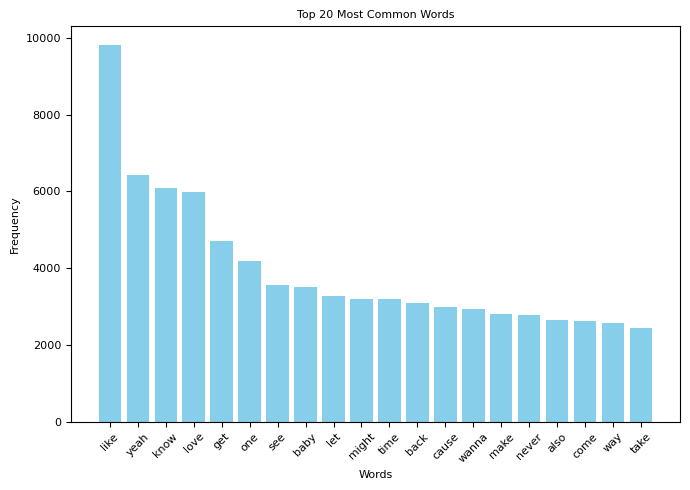

In [25]:
top_words = vocab_freq_dist.most_common(20)
words, frequencies = zip(*top_words)

plt.figure(figsize=(7, 5))
plt.bar(words, frequencies, color='skyblue')
plt.xticks(rotation=45, fontsize=8) 
plt.yticks(fontsize=8)
plt.xlabel('Words', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.title('Top 20 Most Common Words', fontsize=8)

plt.tight_layout() 
plt.show()

## Corpus Statistics by Genre

In [26]:
#instantiate tokenizer

#Create function for preprocessing:
def preprocess_lyrics(lyrics, stopwords_list=None):
    lyrics = lyrics['Lyrics']
    lyrics = lyrics.str.lower()
    
    lyrics = lyrics.str.replace(r'^.*?lyrics', '', regex=True)
    
    lyrics = lyrics.str.replace(r'\[.*?\]', '', regex=True)
    
    lyrics = lyrics.str.replace(r'\d+embed', '', regex=True)
    
    # Tokenize and concatenate
    lyrics_tokenized = lyrics.apply(lambda x: tokenizer.tokenize(x))
    lyrics_tokenized = list(itertools.chain(*lyrics_tokenized))
    
    # Remove stopwords
    if stopwords_list:
        lyrics_tokenized_stopwords_removed = [word for word in lyrics_tokenized if word not in stopwords_list]
    else:
        lyrics_tokenized_stopwords_removed = lyrics_tokenized

    #Lemmatize 
    lemmatizer = WordNetLemmatizer()
    lyrics_final = [lemmatizer.lemmatize(word) for word in lyrics_tokenized_stopwords_removed]

    return lyrics_final


In [27]:
hiphop_df = lyrics_df_2[lyrics_df_2['Genre'] == 'hip-hop']
punk_df = lyrics_df_2[lyrics_df_2['Genre'] == 'punk']
country_df = lyrics_df_2[lyrics_df_2['Genre'] == 'country']
rb_df = lyrics_df_2[lyrics_df_2['Genre'] == 'r&b']
classic_rock_df = lyrics_df_2[lyrics_df_2['Genre'] == 'classic rock']
dance_df = lyrics_df_2[lyrics_df_2['Genre'] == 'dance']
reggae_df = lyrics_df_2[lyrics_df_2['Genre'] == 'reggae']

In [28]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 471 to 2239
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   513 non-null    object
 1   Artist_Name  513 non-null    object
 2   Lyrics       513 non-null    object
 3   Genre        513 non-null    object
dtypes: object(4)
memory usage: 20.0+ KB


In [29]:
lyrics_df_2['Genre'].value_counts()

Genre
country         513
punk            510
hip-hop         484
r&b             390
classic rock    308
dance           270
reggae          225
Name: count, dtype: int64

In [30]:
hiphop_preprocessed = preprocess_lyrics(hiphop_df, stopwords_list)
punk_preprocessed = preprocess_lyrics(punk_df, stopwords_list)
country_preprocessed = preprocess_lyrics(country_df, stopwords_list)
rb_preprocessed = preprocess_lyrics(rb_df, stopwords_list)
classic_rock_preprocessed = preprocess_lyrics(classic_rock_df, stopwords_list)
dance_preprocessed = preprocess_lyrics(dance_df, stopwords_list)
reggae_preprocessed = preprocess_lyrics(reggae_df, stopwords_list)

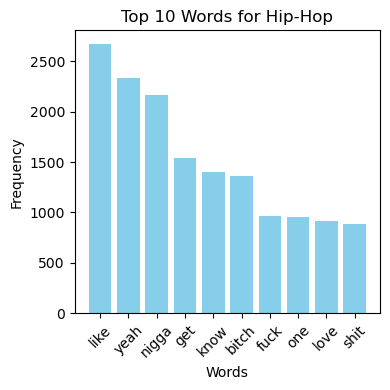

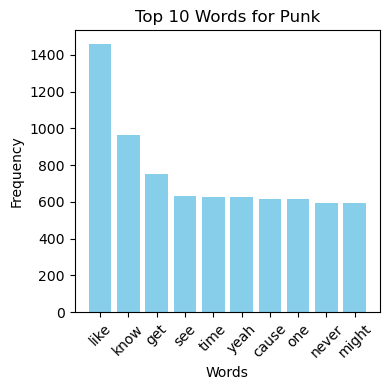

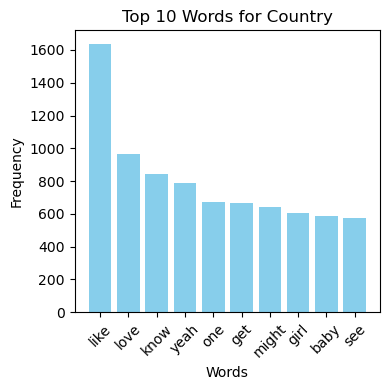

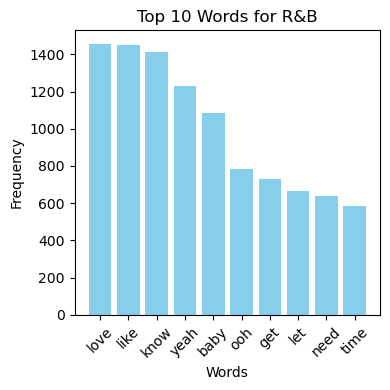

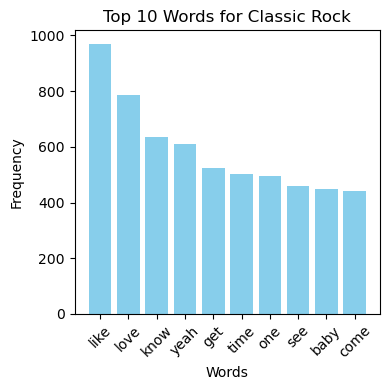

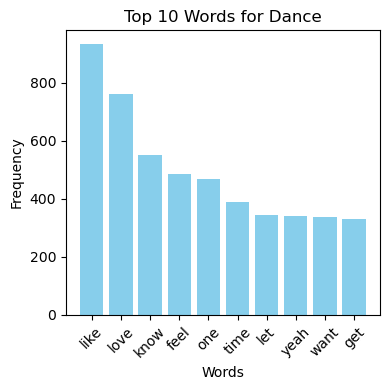

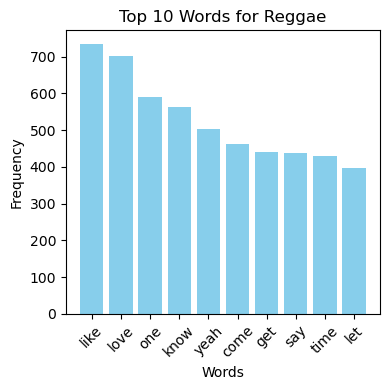

In [31]:
lyrics_by_genre = {'Hip-Hop': hiphop_preprocessed, 'Punk': punk_preprocessed, 'Country': country_preprocessed,
                  'R&B': rb_preprocessed, 'Classic Rock': classic_rock_preprocessed,
                  'Dance': dance_preprocessed, 'Reggae': reggae_preprocessed}

for genre, words in lyrics_by_genre.items():
    freq_dist = nltk.FreqDist(words)
    top_words = freq_dist.most_common(10)

    words, frequencies = zip(*top_words)

    plt.figure(figsize=(4, 4))
    plt.bar(words, frequencies, color='skyblue')
    plt.title(f'Top 10 Words for {genre}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

## Preprocessing

In [32]:
# First train-test split. keep genre split. set random state for reproducibility.
labels = lyrics_df_2['Genre']
text = lyrics_df_2['Lyrics']

X_train, X_test, y_train, y_test = train_test_split(text, labels, stratify=labels, random_state=42)

In [33]:
def preprocess_lyrics_one_doc(lyrics, tokenizer, stopwords_list=None):
    #lower case all words
    lyrics = lyrics.lower()
    #print('lyrics lowered:', lyrics)
    #manual changes given patterns of each text. remove intro para, remove bracketted words which are not lyrics
    #remove outro para that ends in 'embed'
    patterns = [r'^.*?lyrics', r'\[.*?\]', r'\d+embed']
    for pattern in patterns:
        lyrics = re.sub(pattern, '', lyrics)
    #print('lyrics adj:', lyrics)
    # Tokenize
    lyrics_tokenized = tokenizer.tokenize(lyrics)
    #print('lyrics tokenized:', lyrics_tokenized)
    # Remove stopwords
    lyrics_tokenized_stopwords_removed = [word for word in lyrics_tokenized if word not in stopwords_list]
    #print('stop words removed:', lyrics_tokenized_stopwords_removed)
    #Lemmatize 
    lemmatizer = WordNetLemmatizer()
    lyrics_preprocessed = [lemmatizer.lemmatize(word) for word in lyrics_tokenized_stopwords_removed]
    #print('final:', lyrics_preprocessed)
    return lyrics_preprocessed

In [34]:
#preprocess X-train.
X_train_preprocessed = X_train.apply(lambda x: preprocess_lyrics_one_doc(x, tokenizer, stopwords_list))
X_train_preprocessed = X_train_preprocessed.str.join(" ")
X_train_preprocessed

2089    ooh lookin substitution ooh healin heart confu...
1197    current crisis middle east time compelled arra...
171     dah motherfuckin double snoop dogg dah know mo...
2062    could anywhere take hand follow dark even noth...
2514    baby girl yeah angel angel sent heaven love co...
                              ...                        
2470    spent last year rocky mountain way get much hi...
1886    turn light lover dare slow longer last round p...
63      restless ali gatie afterlife baby tate jersey ...
2178    call hawk cause sittin ground bring lighting t...
2317    standing rain head hung low get ticket sold sh...
Name: Lyrics, Length: 2025, dtype: object

In [35]:
#preprocess X-test
X_test_preprocessed = X_test.apply(lambda x: preprocess_lyrics_one_doc(x, tokenizer, stopwords_list))
X_test_preprocessed = X_test_preprocessed.str.join(" ")
X_test_preprocessed

863     know like chicken fried cold beer friday night...
2245    wanna know name cause look way okay think pret...
574     ever give attention every friday night since t...
2575    boombastic want boombastic romantic fantastic ...
1814    ooh day pain still stay make feel helplessness...
                              ...                        
2443    know waiting say forever know sometimes know t...
10      hope know forever fuck hope know ayy ayy yeah ...
108     carvena sleep acoustic majid jordan hand tied ...
94      coi leray yeah johnny yeah woo catchin jet boo...
2587    never get chance together jah tanya love yuh w...
Name: Lyrics, Length: 675, dtype: object

Will be using both count vectorized and tfid vectorized data with both unigrams and bigrams

In [36]:
# Instantiate Vectorizers, only using unigrams.
count_vec = CountVectorizer(ngram_range=(1,2), analyzer='word') 
tfidf_vec = TfidfVectorizer(ngram_range=(1,2), analyzer='word')

In [37]:
#fit to X_train. tranform X_train and X_test
X_train_count = count_vec.fit_transform(X_train_preprocessed)
X_test_count = count_vec.transform(X_test_preprocessed) 
X_train_tfidf = tfidf_vec.fit_transform(X_train_preprocessed) 
X_test_tfidf = tfidf_vec.transform(X_test_preprocessed)


## Modeling 

1. Random Forest
2. MultinomialNB
3. Logistic Regression
4. Neural Networks

### 1. Random Forest Classifier

In [38]:
#Instantiate Random Forest Models
rf_count = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
rf_tfidf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
rf_count.fit(X_train_count, y_train)
rf_tfidf.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [39]:
#cross validate random forest count vectorized model
rf_count_cv = cross_validate(estimator=rf_count,
                           X=X_train_count,
                           y=y_train,
                           cv=5,
                           scoring=['accuracy'],
                           return_train_score=True)

print('Count Vectorized Train Score:', rf_count_cv['train_accuracy'].mean())
print('Count Vectorized Test Score:', rf_count_cv['test_accuracy'].mean())

Count Vectorized Train Score: 0.9825925925925926
Count Vectorized Test Score: 0.5303703703703704


In [40]:
#cross validate random forest tfidf vectorized model
rf_tfidf_cv = cross_validate(estimator=rf_tfidf,
                           X=X_train_tfidf,
                           y=y_train,
                           cv=5,
                           scoring=['accuracy'],
                           return_train_score=True)

print('TFIDF Vectorized Train Score:', rf_count_cv['train_accuracy'].mean())
print('TFIDF Vectorized Test Score:', rf_count_cv['test_accuracy'].mean())

TFIDF Vectorized Train Score: 0.9825925925925926
TFIDF Vectorized Test Score: 0.5303703703703704


In [41]:
rf_count.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)>

Seeing high train scores but low test scores. This suggests there is some overfitting. We will address this with hyperparameter
tuning.

#### Tune Random Forest - Count Vectorized Model

In [42]:
rf_count_gs = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

params_count = {
    'n_estimators': [10, 100, 500],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [3, 4],
    'max_depth': [75, 100],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['entropy', 'gini']}

rf_count_gs_cv = GridSearchCV(estimator=rf_count_gs, param_grid=params_count,
                              cv=3, scoring='accuracy', return_train_score=True,
                              verbose=1)

rf_count_gs_cv.fit(X_train_count, y_train)

#print('Count Vectorized Train Score:', rf_count_gs_cv['train_accuracy'].mean())
#print('Count Vectorized Test Score:', rf_count_gs_cv['test_accuracy'].mean())
rf_count_gs_cv.best_params_                             

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
432 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/base

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 75,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [43]:
rf_count_best_model = rf_count_gs_cv.best_estimator_
rf_count_best_train_score = rf_count_gs_cv.cv_results_['mean_train_score'][rf_count_gs_cv.best_index_]
rf_count_best_test_score = rf_count_gs_cv.best_score_

print('RF Count Best Model:', rf_count_best_model)
print("RF Count Best Model Train Accuracy Score:", rf_count_best_train_score)
print("RF Count Best Model Test Accuracy Score:", rf_count_best_test_score)

RF Count Best Model: RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=75,
                       min_samples_leaf=3, n_estimators=500, n_jobs=-1,
                       random_state=42)
RF Count Best Model Train Accuracy Score: 0.937037037037037
RF Count Best Model Test Accuracy Score: 0.6123456790123457


Still experiencing significant overfitting. Let's try the same process on the TDIDF vectorized data

#### Tune Random Forest - TDIDF Vectorized Model

In [44]:
rf_tfidf_gs = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

params_tfidf = {
    'n_estimators': [10, 100, 500],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [3, 4],
    'max_depth': [75, 100],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['entropy', 'gini']}

rf_tfidf_gs_cv = GridSearchCV(estimator=rf_tfidf_gs, param_grid=params_tfidf,
                              cv=3, scoring='accuracy', return_train_score=True,
                              verbose=1)

rf_tfidf_gs_cv.fit(X_train_tfidf, y_train)

rf_tfidf_gs_cv.best_params_   

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
432 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/base

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 75,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [45]:
rf_tfidf_best_model = rf_tfidf_gs_cv.best_estimator_
rf_tfidf_best_train_score = rf_tfidf_gs_cv.cv_results_['mean_train_score'][rf_tfidf_gs_cv.best_index_]
rf_tfidf_best_test_score = rf_tfidf_gs_cv.best_score_

print('RF TFIDF Best Model:', rf_tfidf_best_model)
print("RF TFIDF Best Model Train Accuracy Score:", rf_tfidf_best_train_score)
print("RF TFIDF Best Model Test Accuracy Score:", rf_tfidf_best_test_score)

RF TFIDF Best Model: RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=75,
                       min_samples_leaf=3, n_estimators=500, n_jobs=-1,
                       random_state=42)
RF TFIDF Best Model Train Accuracy Score: 0.9422222222222222
RF TFIDF Best Model Test Accuracy Score: 0.6


This version performed a bit better than the count vectorized tuned random forest model, but there is still significant 
overfitting

### 2. Multinomial NB

In [46]:
mnb_count = MultinomialNB()
mnb_tfidf = MultinomialNB()
mnb_count.fit(X_train_count, y_train)
mnb_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [47]:
#cross validate random forest count vectorized model
mnb_count_cv = cross_validate(estimator=mnb_count,
                           X=X_train_count,
                           y=y_train,
                           cv=5,
                           scoring=['accuracy'],
                           return_train_score=True)

print('Count Vectorized Train Score:', mnb_count_cv['train_accuracy'].mean())
print('Count Vectorized Test Score:', mnb_count_cv['test_accuracy'].mean())

Count Vectorized Train Score: 0.9737037037037037
Count Vectorized Test Score: 0.5392592592592592


In [48]:
mnb_tfidf_cv = cross_validate(estimator=mnb_tfidf,
                           X=X_train_tfidf,
                           y=y_train,
                           cv=5,
                           scoring=['accuracy'],
                           return_train_score=True)

print('TFIDF Vectorized Train Score:', mnb_count_cv['train_accuracy'].mean())
print('TFIDF Vectorized Test Score:', mnb_count_cv['test_accuracy'].mean())

TFIDF Vectorized Train Score: 0.9737037037037037
TFIDF Vectorized Test Score: 0.5392592592592592


#### Tune Multinomial NB - Count Vectorized Model

In [49]:
mnb_count_gs = MultinomialNB()

params_count = {
    'alpha': [0, 0.5, 1],
    'force_alpha': [True, False],
    'fit_prior': [True, False]}

mnb_count_gs_cv = GridSearchCV(estimator=mnb_count_gs, param_grid=params_count,
                              cv=3, scoring='accuracy', return_train_score=True,
                              verbose=1)

mnb_count_gs_cv.fit(X_train_count, y_train)

#print('Count Vectorized Train Score:', rf_count_gs_cv['train_accuracy'].mean())
#print('Count Vectorized Test Score:', rf_count_gs_cv['test_accuracy'].mean())
mnb_count_gs_cv.best_params_     

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too s

{'alpha': 1, 'fit_prior': True, 'force_alpha': True}

In [50]:
mnb_count_best_model = mnb_count_gs_cv.best_estimator_
mnb_count_best_train_score = mnb_count_gs_cv.cv_results_['mean_train_score'][mnb_count_gs_cv.best_index_]
mnb_count_best_test_score = mnb_count_gs_cv.best_score_

print('MNB Count Best Model:', mnb_count_best_model)
print("MNB Count Best Model Train Accuracy Score:", mnb_count_best_train_score)
print("MNB Count Best Model Test Accuracy Score:", mnb_count_best_test_score)

MNB Count Best Model: MultinomialNB(alpha=1, force_alpha=True)
MNB Count Best Model Train Accuracy Score: 0.9780246913580246
MNB Count Best Model Test Accuracy Score: 0.5377777777777778


Big time overfitting.

#### Tune Multinomial NB - TFIDF Vectorized Model

In [51]:
mnb_tfidf_gs = MultinomialNB()

params_tfidf = {
    'alpha': [0, 0.5, 1],
    'force_alpha': [True, False],
    'fit_prior': [True, False]}

mnb_tfidf_gs_cv = GridSearchCV(estimator=mnb_tfidf_gs, param_grid=params_tfidf,
                              cv=3, scoring='accuracy', return_train_score=True,
                              verbose=1)

mnb_tfidf_gs_cv.fit(X_train_tfidf, y_train)

mnb_tfidf_gs_cv.best_params_   

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too s

{'alpha': 0, 'fit_prior': True, 'force_alpha': False}

In [52]:
mnb_tfidf_best_model = mnb_tfidf_gs_cv.best_estimator_
mnb_tfidf_best_train_score = mnb_tfidf_gs_cv.cv_results_['mean_train_score'][mnb_tfidf_gs_cv.best_index_]
mnb_tfidf_best_test_score = mnb_tfidf_gs_cv.best_score_

print('MNB TFIDF Best Model:', mnb_tfidf_best_model)
print("MNB TFIDF Best Model Train Accuracy Score:", mnb_tfidf_best_train_score)
print("MNB TFIDF Best Model Test Accuracy Score:", mnb_tfidf_best_test_score)

MNB TFIDF Best Model: MultinomialNB(alpha=0, force_alpha=False)
MNB TFIDF Best Model Train Accuracy Score: 0.9827160493827161
MNB TFIDF Best Model Test Accuracy Score: 0.5061728395061728


Still overfitting

## 3. Logistic Regression

In [53]:
lg_count = LogisticRegression(solver='newton-cg', random_state=42)
lg_tfidf = LogisticRegression(solver='newton-cg', random_state=42)
lg_count.fit(X_train_count, y_train)
lg_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42, solver='newton-cg')

In [54]:
#cross validate random forest count vectorized model
lg_count_cv = cross_validate(estimator=lg_count,
                           X=X_train_count,
                           y=y_train,
                           cv=5,
                           scoring=['accuracy'],
                           return_train_score=True)

print('Count Vectorized Train Score:', lg_count_cv['train_accuracy'].mean())
print('Count Vectorized Test Score:', lg_count_cv['test_accuracy'].mean())

Count Vectorized Train Score: 0.9825925925925926
Count Vectorized Test Score: 0.5195061728395062


In [55]:
#cross validate random forest tfidf vectorized model
lg_tfidf_cv = cross_validate(estimator=lg_tfidf,
                           X=X_train_tfidf,
                           y=y_train,
                           cv=5,
                           scoring=['accuracy'],
                           return_train_score=True)

print('TFIDF Vectorized Train Score:', rf_count_cv['train_accuracy'].mean())
print('TFIDF Vectorized Test Score:', rf_count_cv['test_accuracy'].mean())

TFIDF Vectorized Train Score: 0.9825925925925926
TFIDF Vectorized Test Score: 0.5303703703703704


#### Logistic Regression - Count Vectorized Model

In [ ]:
lg_count_gs = LogisticRegression(solver='newton-cg', random_state=42)

params_count = {
    'penalty': ['l2', 'l1', None],
    'tol': [0.0001, .001],
    'C': [.1, 1, 10],
    'max_iter': [50, 100],
    'solver': ['newton-cg', 'sag', 'saga']}
    
    

lg_count_gs_cv = GridSearchCV(estimator=lg_count_gs, param_grid=params_count,
                              cv=3, scoring='accuracy', return_train_score=True,
                              verbose=1)

lg_count_gs_cv.fit(X_train_count, y_train)

lg_count_gs_cv.best_params_  

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of

In [ ]:
lg_count_best_model = lg_count_gs_cv.best_estimator_
lg_count_best_train_score = lg_count_gs_cv.cv_results_['mean_train_score'][lg_count_gs_cv.best_index_]
lg_count_best_test_score = lg_count_gs_cv.best_score_

print('Logistic Regression Count Best Model:', lg_count_best_model)
print("Logistic Regression Count Best Model Train Accuracy Score:", lg_count_best_train_score)
print("Logistic Regression Count Best Model Test Accuracy Score:", lg_count_best_test_score)

#### Logistic Regression - TFIDF Vectorized Model

In [ ]:
lg_tfidf_gs = LogisticRegression(solver='newton-cg', random_state=42)

params_tfidf = {
    'penalty': ['l2', 'l1', None],
    'tol': [0.0001, .001],
    'C': [.1, 1, 10],
    'max_iter': [50, 100],
    'solver': ['newton-cg', 'sag', 'saga']}
    
    

lg_tfidf_gs_cv = GridSearchCV(estimator=lg_tfidf_gs, param_grid=params_tfidf,
                              cv=3, scoring='accuracy', return_train_score=True,
                              verbose=1)

lg_tfidf_gs_cv.fit(X_train_tfidf, y_train)

lg_tfidf_gs_cv.best_params_  

In [ ]:
lg_tfidf_best_model = lg_tfidf_gs_cv.best_estimator_
lg_tfidf_best_train_score = lg_tfidf_gs_cv.cv_results_['mean_train_score'][lg_tfidf_gs_cv.best_index_]
lg_tfidf_best_test_score = lg_tfidf_gs_cv.best_score_

print('Logistic Regression Count Best Model:', lg_tfidf_best_model)
print("Logistic Regression Count Best Model Train Accuracy Score:", lg_tfidf_best_train_score)
print("Logistic Regression Count Best Model Test Accuracy Score:", lg_tfidf_best_test_score)

## 4. Neural Networks

In [ ]:
tensorflow.random.set_seed(42)

In [ ]:
#one-hot encode labels
y_train_encoded = pd.get_dummies(y_train).values
y_test_encoded = pd.get_dummies(y_test).values

In [ ]:
# set up last layer of neural network for multi-class classification with 3 labels
last_layer_activation = 'softmax' 
last_layer_units = 7

model = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
# COv2D input shape =(image_height, image_width, color_channels) for each image
model.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(28, 28, 1)))
# max pool in 2x2 window
model.add(MaxPooling2D(pool_size=(2, 2)))
# define 3x3 filter window sizes. Create 64 filters.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# transition to dense fully-connected part of network
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))